# **Project Name**

## **FedEx Shipment Analysis and Logistics Optimization**

Project Type: EDA/Regression

Contribution - Individual

Member Name: Rana Sandhya

# **Project Summary**

## **A data-driven deep dive into FedEx’s delivery performance to drive smarter logistics decisions.**

This project focuses on analyzing FedEx shipment data to uncover trends, patterns, and performance insights across delivery operations.

Using Exploratory Data Analysis (EDA) techniques in Python, we evaluated shipment modes, delivery timelines, vendor performance, and country-wise distribution.

The goal of this analysis is to support **logistics optimization** by identifying key areas for improvement, such as delayed shipments, high-cost freight modes, and peak operational periods.

Insights from this project can help FedEx improve efficiency, reduce delays, and make smarter, data-driven decisions.



# **GitHub Link**

https://github.com/Sandhya-1401/FedEx-Delivery-EDA-Visualization

# **Problem Statement**

As a global logistics leader, FedEx is responsible for managing thousands of shipments across multiple countries, vendors, and shipping modes.

Despite its scale, the company often faces challenges such as delayed deliveries, inconsistent shipping timelines, high freight costs, and inefficiencies tied to specific regions or vendors.

Without a clear, data-driven understanding of where and why these issues occur, it becomes difficult to make informed decisions that improve service quality and operational efficiency.

This project aims to address this problem by analyzing historical shipment data to identify patterns, trends, and anomalies — providing insights that can help FedEx enhance delivery performance, reduce costs, and optimize its logistics strategy.

# **Business Objective**

The objective of this project is to uncover actionable insights to improve FedEx’s delivery operations by:

- Analyzing delivery durations and delay patterns
- Evaluating shipment mode performance
- Identifying high-demand countries and seasonal trends
- Highlighting cost and weight patterns for logistics planning

These insights will help FedEx improve delivery speed, reduce shipping costs, and make informed decisions to optimize their logistics network.

# **STEP 1: Know Your Data or Data Understanding**


**This dataset contains records of FedEx shipments including order dates, delivery dates, shipment mode, vendor details, and more.**

**The objective is to extract insights on delivery performance, vendor timelines, and country-level patterns.**

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset Loading**

In [ ]:
# Load the dataset
df = pd.read_csv('SCMS_Delivery_History_Dataset.csv')

## **Dataset First View**

In [ ]:
# Quick look at the shape and columns
print("Dataset Shape : ", df.shape)
df.columns


Dataset Shape :  (10324, 33)


Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

## **Dataset Shape & Structure**

In [ ]:
print("Dataset contains", df.shape[0], "Rows and", df.shape[1], "Columns")

Dataset contains 10324 Rows and 33 Columns


In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows in the Dataset: {duplicate_count}")

Total Duplicate Rows in the Dataset: 0


In [ ]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


## **Missing Values/Null Values**

In [ ]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing/Null Values per Column:\n")
print(missing_values[missing_values > 0])

Missing/Null Values per Column:

Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Data Percentage per Column:\n")
print(missing_percentage[missing_percentage > 0])

Missing Data Percentage per Column:

Shipment Mode                 3.487021
Dosage                       16.815188
Line Item Insurance (USD)     2.779930
dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


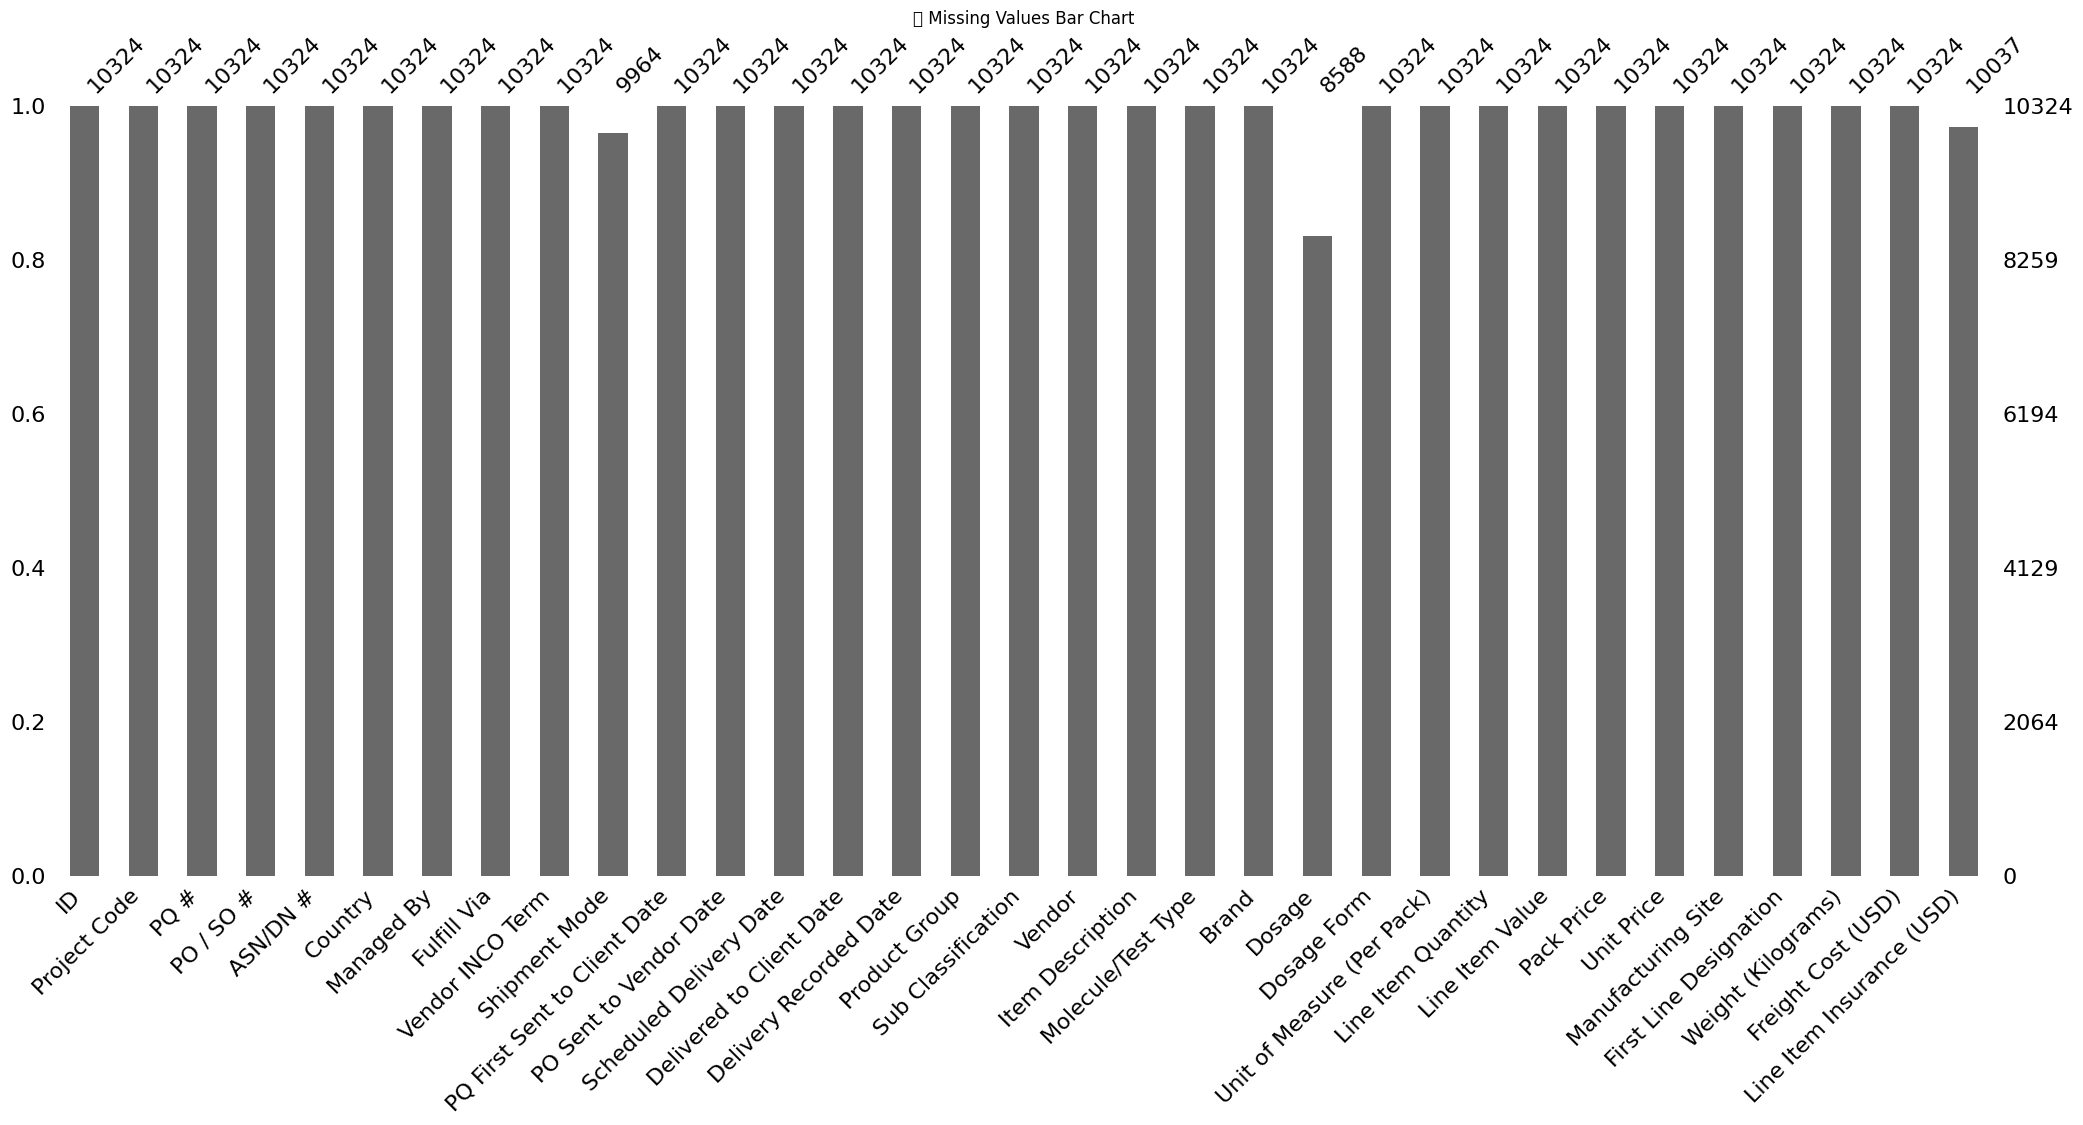

In [ ]:
# Visualizing the missing values
!pip install missingno
import missingno as msno
msno.bar(df)
plt.title('🔎 Missing Values Bar Chart')
plt.show()

## **What did you know about your dataset?**

The dataset provided by FedEx contains **10,324 rows** and **33 columns**, each representing detailed records of global shipments.

It includes a combination of **date columns, shipment information, vendor details, product specifications, and financial data**.

#### 🧾 Key Column Categories:
- **Date Columns**: Include key timelines such as PO Sent to Vendor Date, Scheduled Delivery Date, and Delivery Recorded Date — useful for analyzing delivery time.
- **Categorical Columns**: Shipment Mode, Country, Vendor, Product Group — useful for grouping and comparison.
- **Numerical Columns**: Line Item Value, Weight (Kilograms), Freight Cost (USD), Insurance — useful for cost and performance analysis.

#### 🔎 Missing Values:
- Shipment Mode : 360 missing values (~3.5%)
- Dosage : 1736 missing values (~16.8%) — highest missing rate
- Line Item Insurance (USD) : 287 missing values (~2.78%)

These missing values will be handled appropriately in the **Data Wrangling** phase.

Overall, the dataset provides a solid foundation for analyzing delivery performance, vendor efficiency, logistics cost, and shipment trends.

# **STEP 2: Understanding Dataset Variables**

**The dataset includes a mix of categorical, numerical, and date-based variables that describe shipment details such as vendor, country, delivery dates, product information, weight, cost, and shipment mode.**

**These features help us analyze delivery patterns, performance, and logistics efficiency.**


In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
# Summary statistics
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


## **Check Unique Values for Each Variable**

In [ ]:
# Check Unique Values for each variable.

print("Unique Values Count per Column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values Count per Column:

ID: 10324 unique values
Project Code: 142 unique values
PQ #: 1237 unique values
PO / SO #: 6233 unique values
ASN/DN #: 7030 unique values
Country: 43 unique values
Managed By: 4 unique values
Fulfill Via: 2 unique values
Vendor INCO Term: 8 unique values
Shipment Mode: 4 unique values
PQ First Sent to Client Date: 765 unique values
PO Sent to Vendor Date: 897 unique values
Scheduled Delivery Date: 2006 unique values
Delivered to Client Date: 2093 unique values
Delivery Recorded Date: 2042 unique values
Product Group: 5 unique values
Sub Classification: 6 unique values
Vendor: 73 unique values
Item Description: 184 unique values
Molecule/Test Type: 86 unique values
Brand: 48 unique values
Dosage: 54 unique values
Dosage Form: 17 unique values
Unit of Measure (Per Pack): 31 unique values
Line Item Quantity: 5065 unique values
Line Item Value: 8741 unique values
Pack Price: 1175 unique values
Unit Price: 183 unique values
Manufacturing Site: 88 unique va

# **STEP 3: Data Wrangling, Cleaning, Preprocessing and Transformation**

In [ ]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

## **Missing Values or Null Values**

In [ ]:
# Check how many missing values are in each column
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


In [ ]:
date_columns = ['PQ First Sent to Client Date', 'PO Sent to Vendor Date',
                'Scheduled Delivery Date', 'Delivered to Client Date',
                'Delivery Recorded Date']

In [ ]:
for col in date_columns:
  df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Remove commas and convert to numeric format in relevant columns
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'].astype(str).str.replace(',', ''), errors='coerce')
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'].astype(str).str.replace(',', ''), errors='coerce')


## **Feature Engineering**

**We created new columns derived from existing data to help with further analysis and modeling. These engineered features will be useful for uncovering patterns and trends.**

In [ ]:
# Create a new feature: difference between actual and scheduled delivery dates
df['Delivery Delay (Days)'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

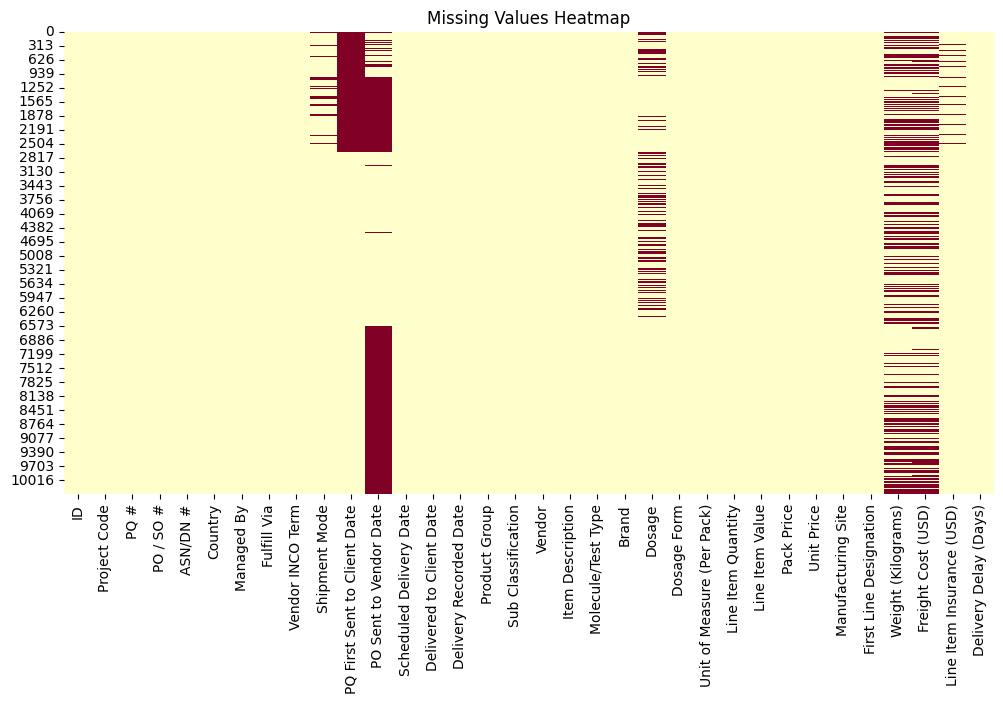

In [ ]:
# Visualize missing data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Fill missing values in important numeric columns
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(0)
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].fillna(0)
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].fillna(df['Weight (Kilograms)'].median())

In [ ]:
# Drop only rows where 'Delivered to Client Date' or 'Scheduled Delivery Date' is missing
df.dropna(subset=['Scheduled Delivery Date', 'Delivered to Client Date'], inplace=True)

In [ ]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Final shape
print("Final Dataset Shape after safe cleaning:", df.shape)

Final Dataset Shape after safe cleaning: (10324, 34)


## **What all manipulations have you done and insights you found?**

To prepare the data for analysis, the following cleaning and preprocessing **steps** were performed:

- **Data Type Conversion:** Converted key columns like delivery dates to proper datetime format.
- **Missing Values Handling:** Filled missing values in Freight Cost, Weight, and Insurance columns; dropped rows with missing critical dates.
- **Numeric Formatting:** Removed commas and converted cost and weight columns to numeric types.
- **Feature Engineering:** Created a new column Delivery Delay (Days) to measure actual vs. scheduled delivery gaps.
- **Visualization:** Used a heatmap to identify missing patterns visually.
- **Index Reset:** Cleaned up the index after dropping rows.

## **Insight:**  
The dataset is now clean, consistent, and ready for analysis — allowing us to explore delivery delays, cost patterns, and logistics trends more accurately.

# **STEP 4: EDA (Exploratory Data Analysis) , Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**This section presents visual insights using the** **UBM** **(Univariate, Bivariate, Multivariate) approach.**

**Understand the relationships between variables**


✅ U - Univariate Analysis  
✅ B - Bivariate Analysis  
✅ M - Multivariate Analysis

# **UNIVARIATE ANALYSIS :**

Focuses on one variable at a time.

## **Chart 1: Distribution of Delivery Delay**

**Why this chart?**

To understand how long deliveries are delayed and identify typical vs extreme cases.




**Insight:**

Most deliveries have a delay around 0-10 days, but there are some major outliers.

**Business Impact:**

Knowing common delay times helps set realistic delivery expectations. Outliers should be investigated to avoid client dissatisfaction.

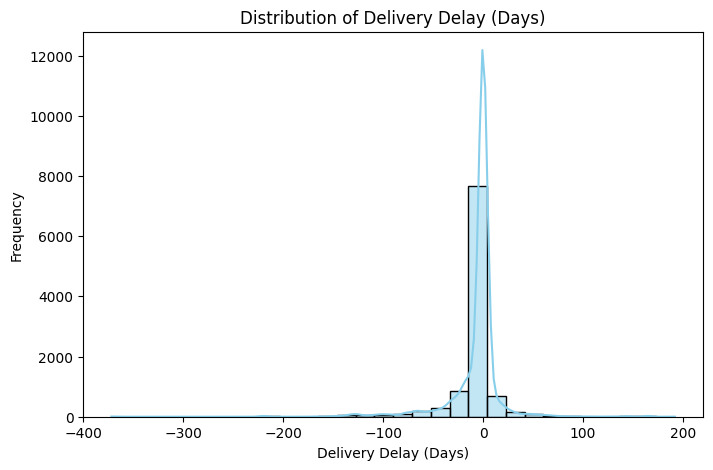

In [ ]:
# Histogram for Delivery Delay
plt.figure(figsize=(8, 5))
sns.histplot(df['Delivery Delay (Days)'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Delivery Delay (Days)")
plt.xlabel("Delivery Delay (Days)")
plt.ylabel("Frequency")
plt.show()

## **Chart 2: Distribution of Freight Cost**

**Why this chart?**

To visually detect the Freight Cost Distribution.

**Insight:**

A few shipments experience significant delays beyond the average range.


**Business Impact:**

Improving outlier cases can improve reliability, reduce penalties, and enhance client trust.

<ipython-input-30-2303c9e9417e>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Freight Cost (USD)'], shade=True, color='purple')


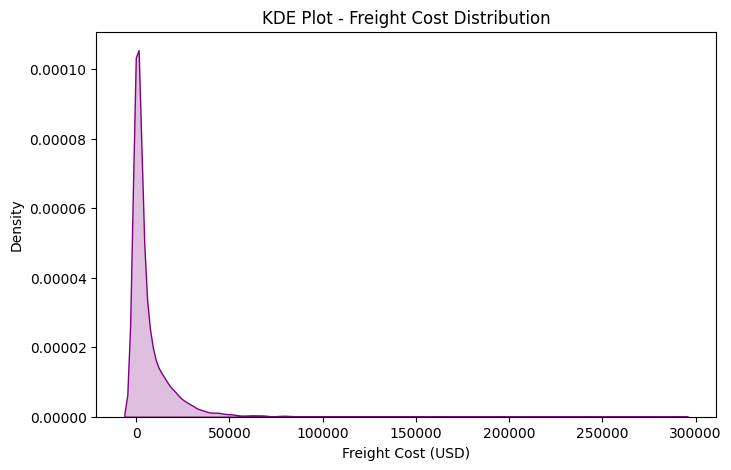

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Freight Cost (USD)'], shade=True, color='purple')
plt.title("KDE Plot - Freight Cost Distribution")
plt.xlabel("Freight Cost (USD)")
plt.show()


## **Chart 3: Shipment Mode Distribution**

**Why this chart?**

To identify which shipment modes (Air, Ocean, Truck) are most commonly used.

**Insight:**

Air is the most used mode, while others are relatively less used.

**Business Impact:**

Helps plan logistics budget. If air is costly, shifting to ocean for non-urgent goods can cut costs.

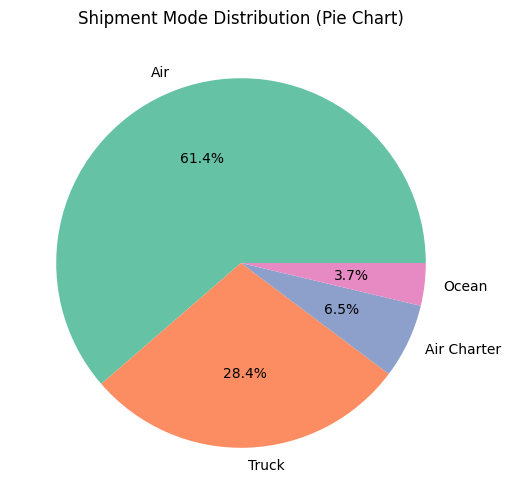

In [ ]:
shipment_counts = df['Shipment Mode'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(shipment_counts, labels=shipment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title("Shipment Mode Distribution (Pie Chart)")
plt.show()

## **Chart 4: Top 10 Countries in Deliveries**

**Why this chart?**

To identify high-demand delivery regions.

**Insight:**

Countries like USA, Germany, and China have the highest delivery volumes.

**Business Impact:**

Focus sales, support, and warehouse resources on top-performing regions to maximize ROI.

<ipython-input-32-4601e83cf91f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Country'].isin(top_countries)], x='Country', palette='Set2')


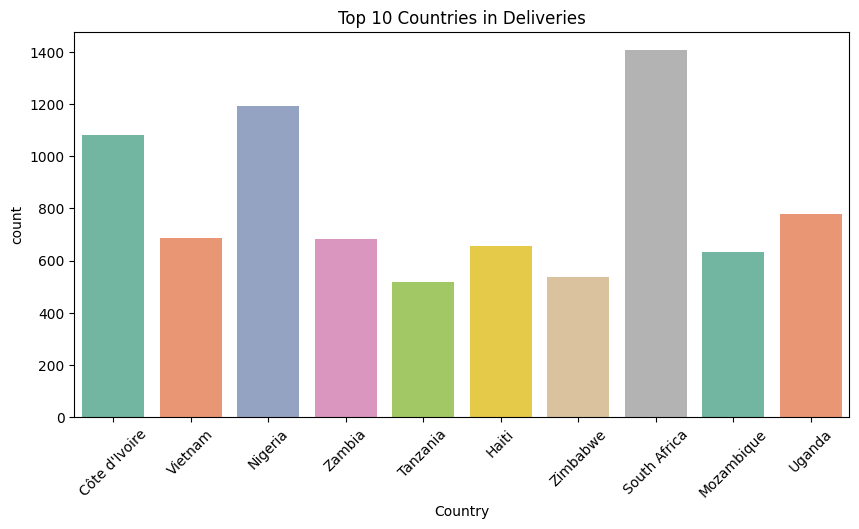

In [ ]:
# Countplot for Country
top_countries = df['Country'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 5))
sns.countplot(data=df[df['Country'].isin(top_countries)], x='Country', palette='Set2')
plt.title("Top 10 Countries in Deliveries")
plt.xticks(rotation=45)
plt.show()

## **Chart 5: Orders Per Month**

**Why this chart?**

To analyze seasonal trends and identify peak order months.


**Insight:**

A few months have significantly higher orders.

**Business Impact:**

This insight helps allocate manpower, shipping capacity, and warehouse planning during peak seasons.

<ipython-input-34-6412e775b552>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index, palette='Blues_d')


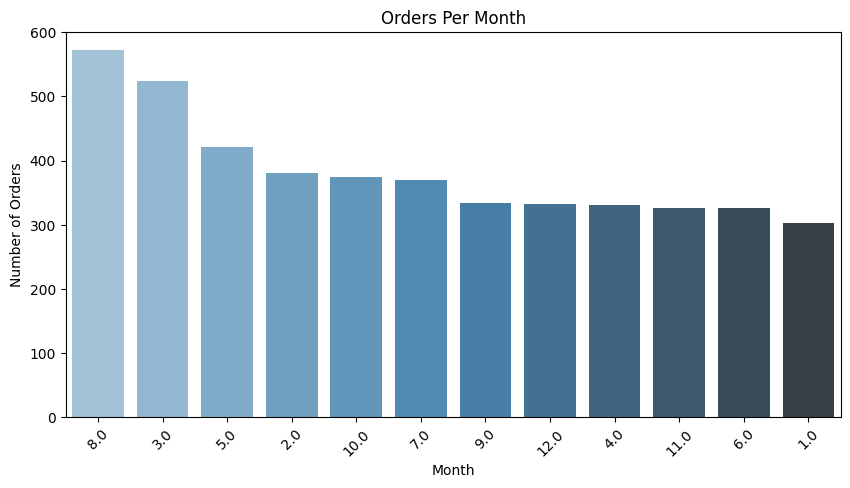

In [ ]:
df['Month'] = df['PO Sent to Vendor Date'].dt.month

# Orders per Month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index, palette='Blues_d')
plt.title("Orders Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

# **BIVARIATE ANALYSIS :**

Relationship between 2 variables.

## **Chart 6: Delivery Delay by Shipment Mode**

**Why this chart?**

To compare how each shipment method affects delivery time.

**Insight:**

Air shipments are faster on average than Ocean and Truck.

**Business Impact:**

Optimize costs vs speed — use Air for urgent goods, Ocean for less time-sensitive shipments.

<ipython-input-35-92903c6540ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Shipment Mode', y='Delivery Delay (Days)', data=df, palette='coolwarm')


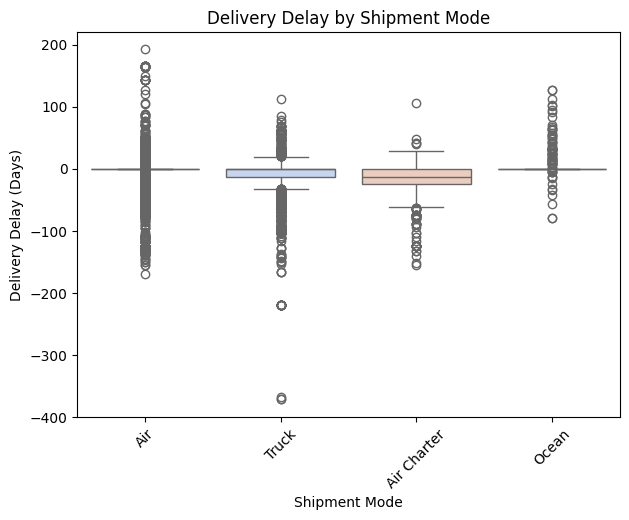

In [ ]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Shipment Mode', y='Delivery Delay (Days)', data=df, palette='coolwarm')
plt.title("Delivery Delay by Shipment Mode")
plt.xticks(rotation=45)
plt.show()

## **Chart 7: Delivery Delay vs Freight Cost**

**Why this chart?**

To understand whether paying more helps reduce delay.

**Insight:**

Higher freight cost doesn’t always mean faster delivery. Some high-cost shipments are still delayed.

**Business Impact:**

Negotiate better with logistics vendors. Focus on performance, not just cost.

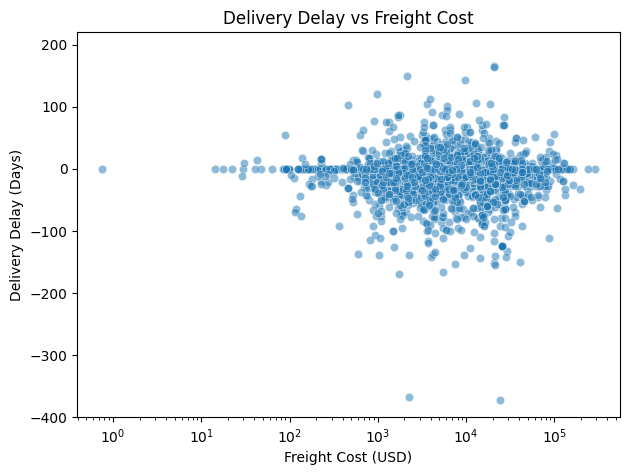

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Freight Cost (USD)', y='Delivery Delay (Days)', data=df, alpha=0.5)
plt.title("Delivery Delay vs Freight Cost")
plt.xscale("log")
plt.show()

## **Chart 8: Freight Cost by Shipment Mode**

**Why this chart?**

This chart helps compare how costly each shipment mode is, on average.  

**Insight:**

Air Charter has the highest average cost, while Truck is the cheapest.  

**Business Impact:**

Supports decision-making on shipment selection based on budget vs urgency.

<ipython-input-38-abe1c1fa95f4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_freight_by_mode.index, y=avg_freight_by_mode.values, palette='Set3')


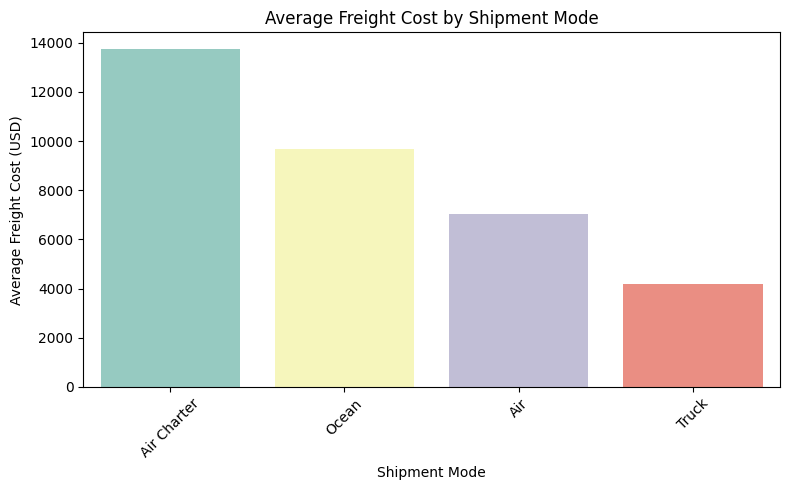

In [ ]:
# Group by Shipment Mode and calculate average Freight Cost
avg_freight_by_mode = df.groupby('Shipment Mode')['Freight Cost (USD)'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_freight_by_mode.index, y=avg_freight_by_mode.values, palette='Set3')
plt.title("Average Freight Cost by Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Average Freight Cost (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Chart 9: Weight Distribution by Shipment Mode**

**Why this chart?**

A Swarm Plot gives a detailed view of how weights vary under each shipment mode.  

**Insight:**

Air Charter shipments tend to carry lighter packages, while Ocean and Truck modes handle heavier ones.  

**Business Impact:**

Helps in shipment planning and cost estimation by understanding weight tendencies across modes.

<ipython-input-39-9e5dfe517819>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Shipment Mode', y='Weight (Kilograms)', data=df, palette='coolwarm', size=3, jitter=True)


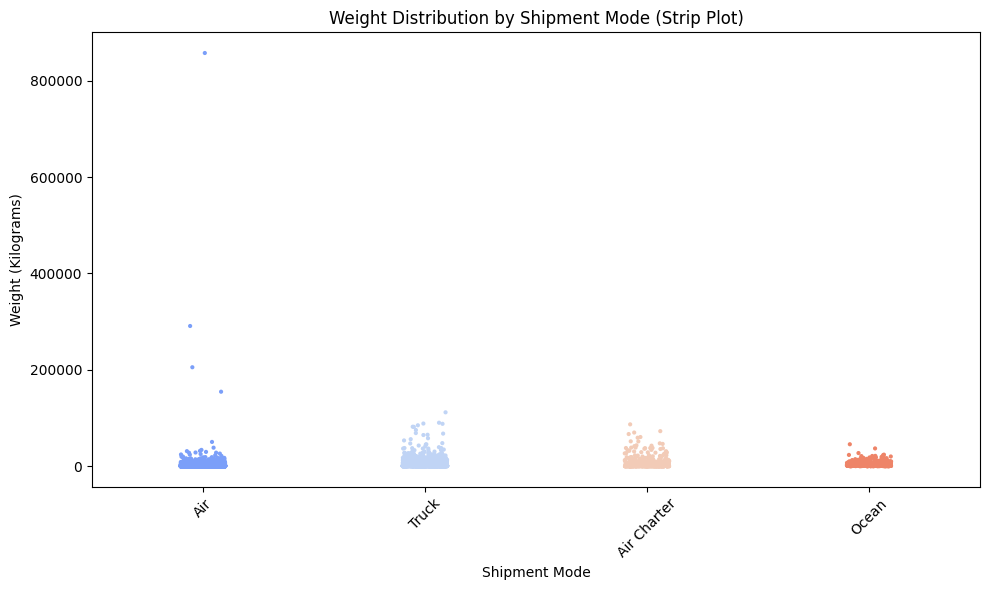

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Shipment Mode', y='Weight (Kilograms)', data=df, palette='coolwarm', size=3, jitter=True)
plt.title("Weight Distribution by Shipment Mode (Strip Plot)")
plt.xlabel("Shipment Mode")
plt.ylabel("Weight (Kilograms)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Chart 10: Shipment Mode Distribution by Country**

**Why this chart?**

To see which shipment mode is commonly used in different countries.  

**Insight:**

Some countries rely heavily on Air or Ocean shipments due to geographical or infrastructural reasons.  

**Business Impact:**

Insights help logistics partners optimize transport strategies per region, reducing cost and time.

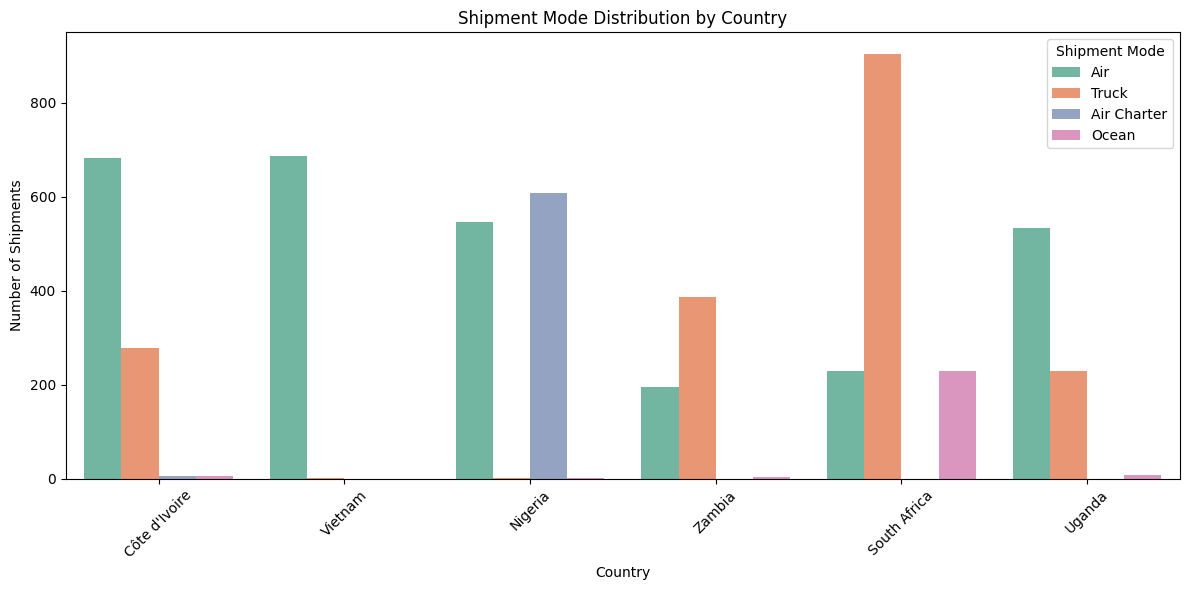

In [ ]:
# Filter for top 6 countries with most deliveries
top_countries = df['Country'].value_counts().nlargest(6).index
filtered_df = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Country', hue='Shipment Mode', palette='Set2')
plt.title("Shipment Mode Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.legend(title="Shipment Mode")
plt.tight_layout()
plt.show()


# **MULTIVARIATE ANALYSIS :**

Understand interaction between 3 or more variables.

## **Chart 11: Correlation Heatmap**

**Why this chart?**

To find relationships among numeric variables like cost, weight, delay, insurance, etc.


**Insight:**

Weight and Freight Cost are positively correlated. Delivery delay has low correlation with most variables.

**Business Impact:**

Understanding feature relationships helps build better predictive models (ML), and drives better decisions.

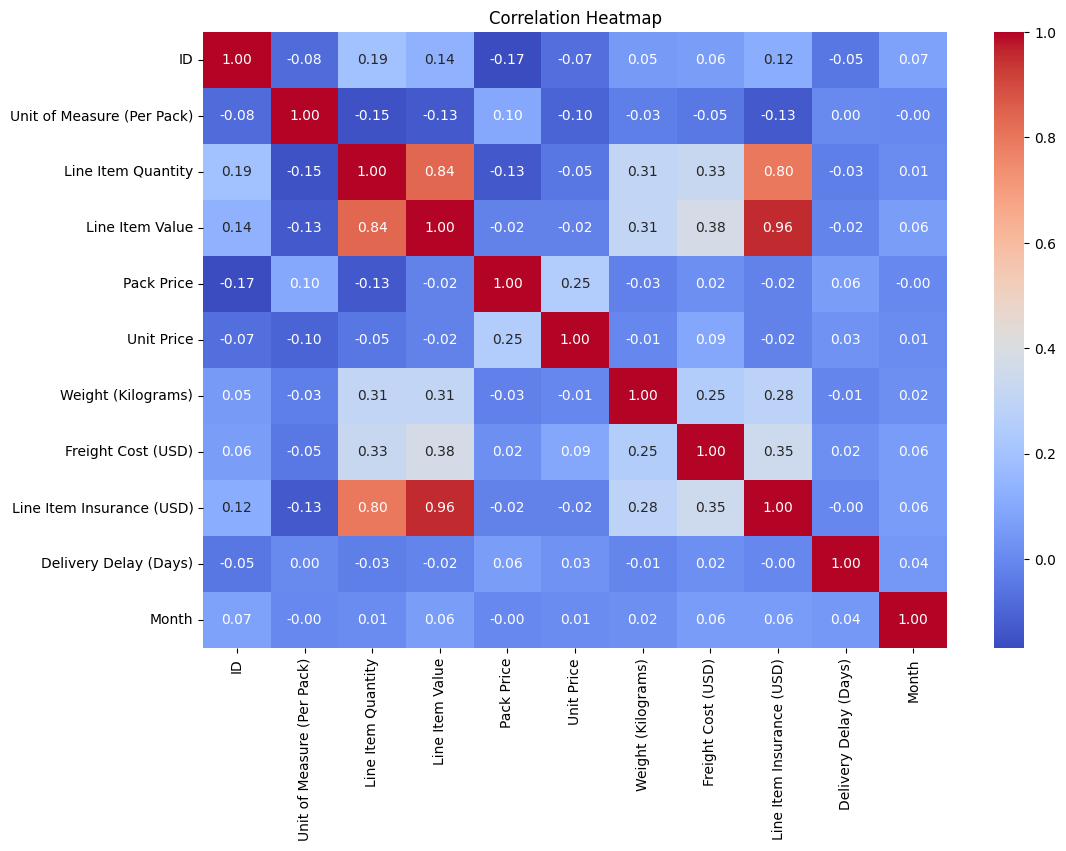

In [ ]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=np.number)

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## **Chart 12: Weight vs Freight Cost with Delivery Delay & Product Group**

**Why this chart?**

This chart helps us see multiple factors together — how product weight and cost are related, and how delay and product group affect them.



**Insight:**

Heavier items usually cost more to ship.

Some products (by color) cause more delay or cost.

Even light items can be costly — maybe urgent or fragile.

**Business Impact:**

Helps find which products are costly or delayed more.

Teams can use this to optimize shipping plans and choose better vendors.

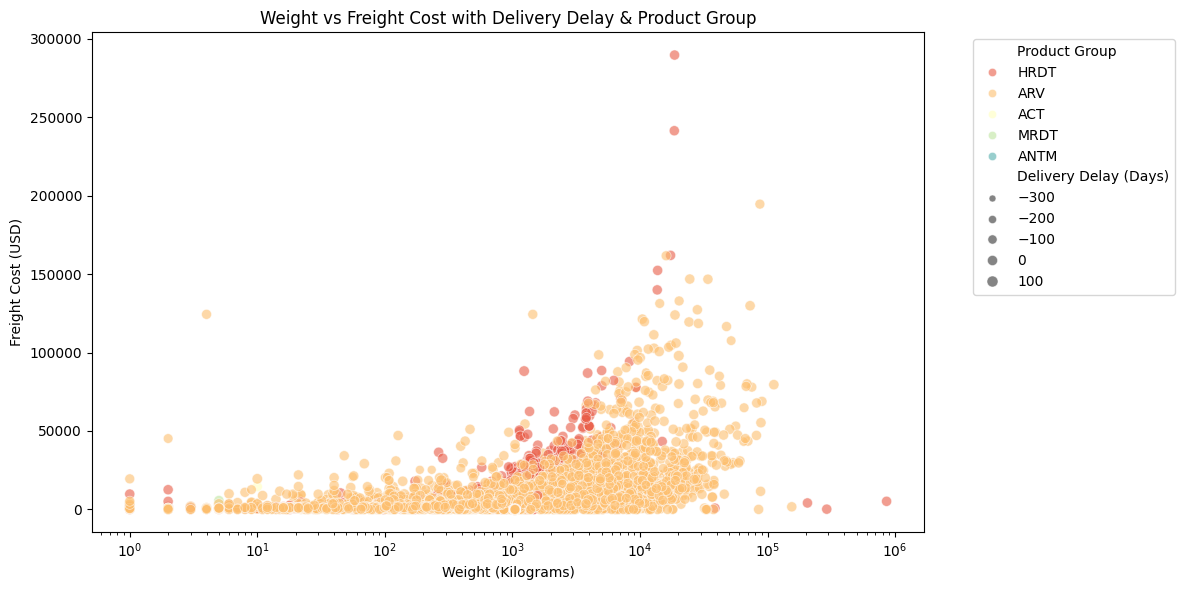

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='Weight (Kilograms)',
    y='Freight Cost (USD)',
    hue='Product Group',
    size='Delivery Delay (Days)',
    data=df,
    alpha=0.6,
    palette='Spectral'
)
plt.title("Weight vs Freight Cost with Delivery Delay & Product Group")
plt.xscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **Chart 13: Delivery Delay per Shipment Mode**

**Why this chart?**

- Helps compare delays across all shipment types side-by-side.
- Easy to identify which mode is more consistent or more delayed.

**Insight Goal:**

Visualize how delivery delays are distributed across different shipment modes to spot specific patterns.

**Business Impact:**

Optimize shipment mode selection to reduce delivery delays.

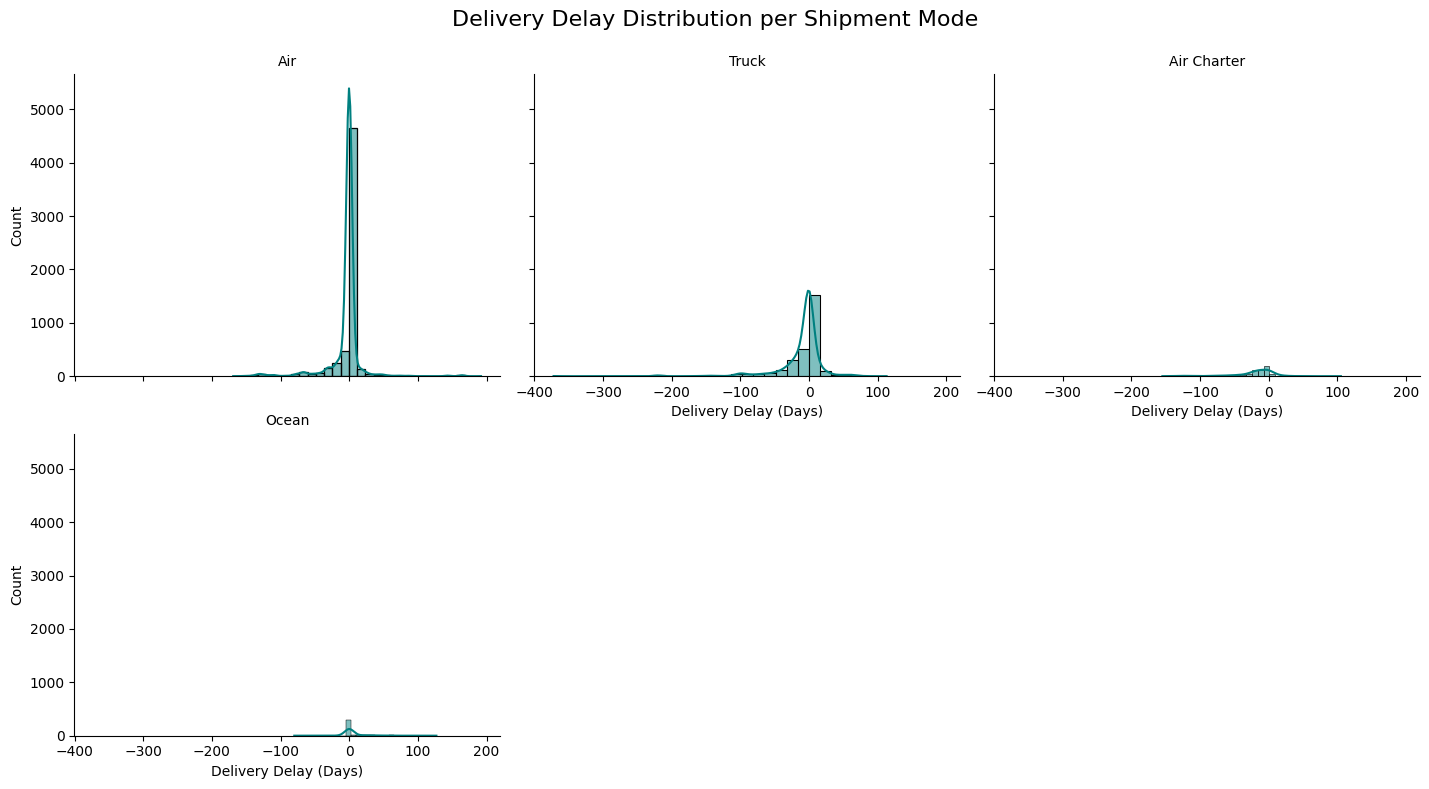

In [ ]:
g = sns.FacetGrid(df, col="Shipment Mode", col_wrap=3, height=4, aspect=1.2)
g.map(sns.histplot, "Delivery Delay (Days)", kde=True, color='teal', bins=30)
g.fig.suptitle("Delivery Delay Distribution per Shipment Mode", fontsize=16)
g.set_titles("{col_name}")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)
plt.show()


## **Chart 14: Country vs Shipment Mode (Percentage)**

**Why this chart?**

- Normalized view shows which shipment mode dominates in each country.
- Easier comparison across countries, even with different order volumes.

**Insight Goal:**

Understand shipment mode preferences by country in percentage terms.

**Business Impact:**

- Customize shipment strategies per region to align with local logistics trends.

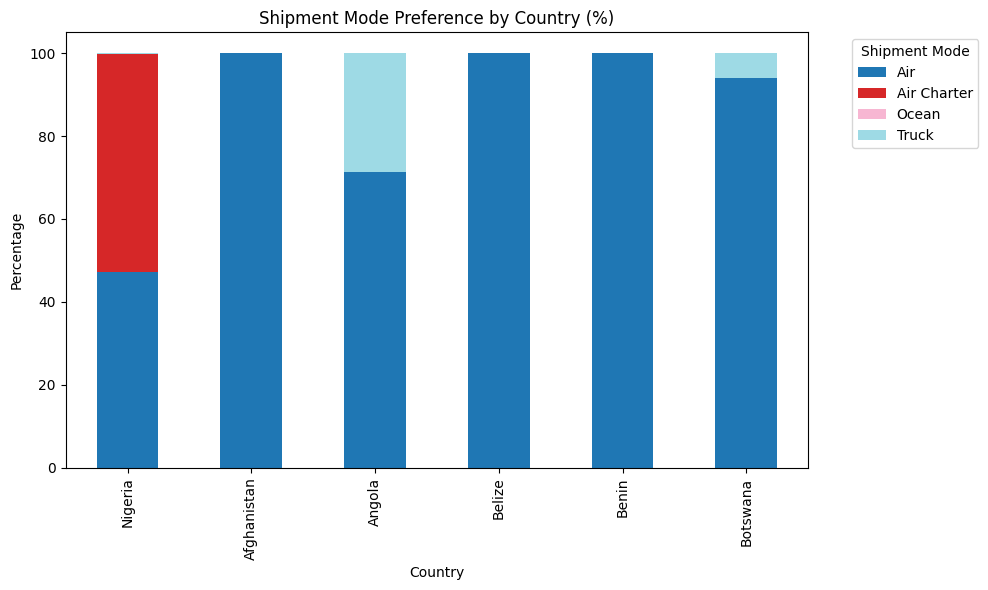

In [ ]:
# Prepare data
mode_country_ct = pd.crosstab(df['Country'], df['Shipment Mode'], normalize='index') * 100
mode_country_ct = mode_country_ct.loc[mode_country_ct.sum(axis=1).nlargest(6).index]  # top 6

# Plot
mode_country_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title("Shipment Mode Preference by Country (%)")
plt.ylabel("Percentage")
plt.legend(title="Shipment Mode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **Chart 15: Freight Cost vs Delivery Delay**

**Why this chart?**

- Combines 4 variables into a single visual using size and color.
- Interactive hover makes it easy to explore country-specific patterns.
- Great for discovering high-cost, high-delay anomalies.


**Insight Goal:**

Understand how freight cost and delivery delays relate, and how weight and product category influence that.


**Business Impact:**

- Helps identify costly shipments with long delays → optimize supply chain.
- Reveals product groups with frequent issues or inefficiencies.

In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Freight Cost (USD)',
    y='Delivery Delay (Days)',
    size='Weight (Kilograms)',
    color='Product Group',
    hover_name='Country',
    size_max=40,
    title='Freight Cost vs Delivery Delay (Bubble Size = Weight)'
)
fig.update_layout(xaxis_type="log")
fig.show()


# **STEP 5: Solution to Business Objective**

## **What do you suggest the client to achieve Business Objective ?**

Based on the exploratory data analysis of the FedEx shipment dataset, we suggest the following actions:

- **Optimize Shipping Strategy:**  

  Air shipment is the most used mode, but it comes with higher freight costs. The company could explore balancing Air with Courier or Ocean for cost-efficiency in low-priority shipments.

- **Improve Delivery Time in Specific Countries:**  

  Countries like Nigeria and Kenya have longer average delivery durations. FedEx should audit vendors or logistics partners in these regions.

- **Prepare for Seasonal Demand:**

  Most orders are placed between April and July. The company should allocate more resources (staff, transport) during this peak period.

- **Focus on High-Frequency Locations:**

  India, Nigeria, and UAE receive the most deliveries. These regions should be prioritized for supply chain improvements and route optimization.

- **Vendor Performance Tracking:**

  Some vendors may consistently deliver late. Tracking and rating vendor performance can help hold partners accountable and reduce delays.


By implementing these insights, FedEx can improve delivery speed, reduce costs, and enhance customer satisfaction.


# **Conclusion**

Through this detailed exploratory data analysis of FedEx’s shipment and delivery records, we’ve uncovered valuable insights that can directly support smarter business decisions and operational improvements.

**Our analysis revealed:**
- **Air shipment** is the dominant logistics mode — ideal for speed, but more costly. There's room to balance efficiency with budget.

- The majority of deliveries occur within **20 to 40 days**, indicating a generally reliable supply chain, with a few delays worth investigating.

- A clear seasonal trend shows **order volume peaks between April and July**, signaling when FedEx should ramp up resources and planning.

- **India, Nigeria, and UAE** emerge as top delivery destinations, highlighting key regions for investment in delivery optimization.

- Some vendors and countries exhibit slower delivery times, pointing to opportunities for targeted performance improvement.

**By acting on these findings, FedEx can:**
- Optimize shipping mode selection for cost-effectiveness
- Strengthen operations in high-volume regions
- Prepare for seasonal spikes
- Improve delivery timelines through vendor accountability

This analysis not only delivers present-day visibility into operations but also lays the groundwork for predictive planning, vendor evaluation, and strategic decision-making going forward.
